# Advantage of relaxed SP definition

In this experiment, for a synthetic data set with a subset of designed SP and a number of spurrious (and very weak) SP occurences, we will show that our framework for a relaxed definition allows us to differentiate between the two groups of occurences

In [1]:
import pandas as pd
import detect_simpsons_paradox as dsp
import numpy as np

For our evaluations, we will need a few different types of trend objects. The package provides dictionaries of default trend lists for ease of use of default settings

In [2]:
dsp.default_binary_trends

{'binary_rank': detect_simpsons_paradox.trends.binary_mean_rank_trend,
 'binary_sign': detect_simpsons_paradox.trends.binary_pearson_trend}

In [3]:
dsp.default_distance_trends

{'lin_reg': detect_simpsons_paradox.trends.linear_trend,
 'rank_trend': detect_simpsons_paradox.trends.mean_rank_trend}

In [4]:
# make a list of initialized objects from each
binary_trend_objs = [trend() for trend in dsp.default_binary_trends.values()]
distance_trend_objs = [trend() for trend in dsp.default_distance_trends.values()]
# print one to see that it's a list of initialized objects
binary_trend_objs

## Regression SP

First, we load a dataset as a labeledDataFrame object that has a number of continuous type regressions.  We will load it twice, one for the detection only case and one for the case with a continuous-valued distance. 

In [5]:
labeled_df_bin = dsp.labeledDataFrame('../data/synthetic_continuous16')
labeled_df_dist = dsp.labeledDataFrame('../data/synthetic_continuous16')

Next we compute the trends using only the binary types and view a sample of 10 random trends

In [6]:
view_sample_bin = labeled_df_bin.get_subgroup_trends_1lev(binary_trend_objs).sample(10)
view_sample_bin

,feat1,feat2,group_feat,subgroup,subgroup_trend,subgroup_trend_quality,trend_type,agg_trend,agg_trend_quality
4437,x12,x16,F,F4,positive,0.065058,binary_sign,positive,0.062528
3042,x7,x11,A,A0,positive,0.234044,binary_sign,negative,-0.005823
2671,x6,x10,E,E1,positive,0.231727,binary_sign,negative,-0.046183
1161,x3,x4,F,F4,negative,-0.142819,binary_sign,negative,-0.139608
3846,x9,x16,E,E6,positive,0.284318,binary_sign,positive,0.129111
3035,x7,x10,G,G0,negative,-0.031005,binary_sign,negative,-0.073925
3269,x7,x16,G,G0,positive,0.126758,binary_sign,positive,0.099541
3011,x7,x10,C,C0,positive,0.079779,binary_sign,negative,-0.073925
2649,x6,x9,H,H0,positive,0.204017,binary_sign,positive,0.041975
87,x1,x4,C,C1,negative,-0.011997,binary_sign,positive,0.058724


Lets look a little at some of the trends that are found

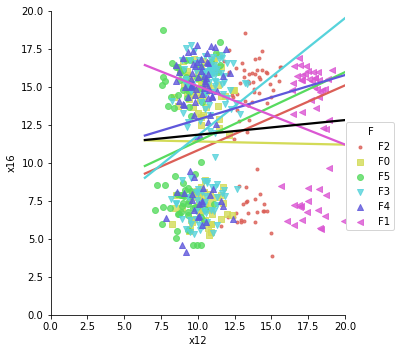

In [7]:
# look at the first of the random selection
view_to_plot = view_sample_bin.loc[view_sample_bin.index[0],['feat1','feat2','group_feat']]

labeled_df_bin.sp_plot(*view_to_plot)

and a view where we know there is strong SP

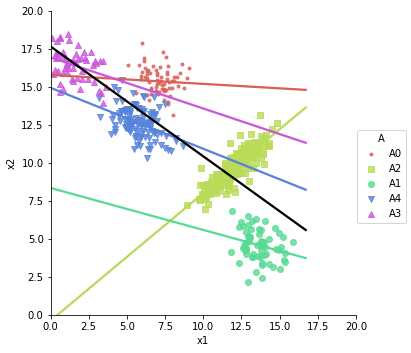

In [8]:

labeled_df_bin.sp_plot('x1','x2','A')

Next we compute the trends using the continuous trends,, and view a sample of 10 random trends

In [9]:
view_sample_dist = labeled_df_dist.get_subgroup_trends_1lev(distance_trend_objs).sample(10)
view_sample_dist

,feat1,feat2,group_feat,subgroup,subgroup_trend,subgroup_trend_quality,trend_type,agg_trend,agg_trend_quality
4273,x11,x16,E,E4,0.122339,0.113054,lin_reg,0.067416,0.060411
1021,x2,x14,B,B2,0.011213,0.011687,lin_reg,-0.027595,0.028375
4435,x12,x16,F,F2,0.427231,0.097065,lin_reg,0.096541,0.062528
2532,x5,x16,H,H0,-0.049495,0.228277,lin_reg,-0.019823,0.022534
4553,x13,x16,F,F3,0.001596,0.001716,lin_reg,0.060456,0.064109
4574,x14,x15,C,C3,-0.054488,0.057666,lin_reg,-0.087007,0.087392
3006,x7,x10,A,A3,0.212711,0.136470,lin_reg,-0.104880,0.073925
3008,x7,x10,B,B0,-0.132894,0.095619,lin_reg,-0.104880,0.073925
797,x2,x8,D,D3,-0.000514,0.001650,lin_reg,0.005721,0.010693
1588,x3,x15,F,F2,-0.068058,0.069743,lin_reg,0.003965,0.003953


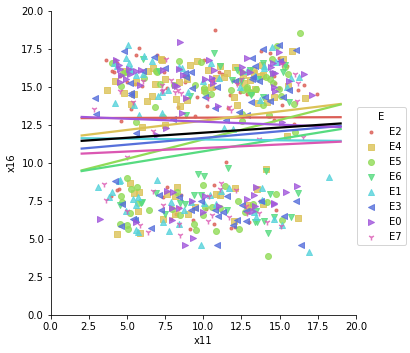

In [10]:
# look at the first of the random selection
view_to_plot = view_sample_dist.loc[view_sample_dist.index[0],['feat1','feat2','group_feat']]

labeled_df_dist.sp_plot(*view_to_plot)

Now, we can filter each table for Simpson's Paradox, using the default setting for each

In [11]:
bin_sp = labeled_df_bin.get_SP_rows()
print(len(bin_sp))
trend_q = .1
bin_det = bin_sp[np.abs(bin_sp['agg_trend_quality'])>trend_q].index
print(len(bin_det))

1659
44


In [28]:
dist_sp = labeled_df_dist.get_SP_rows(thresh = .15)
print(len(dist_sp))
dist_det = dist_sp[np.abs(dist_sp['agg_trend_quality'])>trend_q].index
print(len(dist_det))

132
23


27


/home/smb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(1, 26 + 1) instead
  """


feat1                              x9
feat2                             x15
group_feat                          C
subgroup                           C5
subgroup_trend               negative
subgroup_trend_quality     -0.0121169
trend_type                binary_sign
agg_trend                    positive
agg_trend_quality            0.145886
distance                            1
SP                               True
Name: 3796, dtype: object

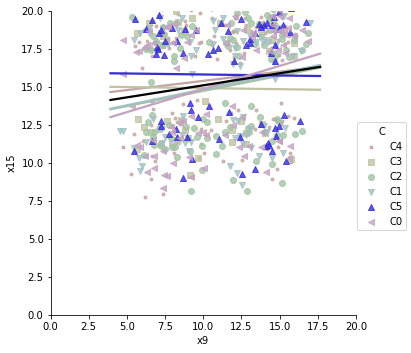

In [29]:
# unique to bin
bin_only= [b for b in bin_det if not(b in dist_det)]
print(len(bin_only))
# randomly select one
cursel = np.random.random_integers(len(bin_only)-1)

view_to_plot = labeled_df_bin.result_df.loc[bin_only[cursel],['feat1','feat2','group_feat']]
bold_level = labeled_df_bin.result_df.loc[bin_only[cursel],'subgroup']

labeled_df_bin.sp_plot(*view_to_plot,bold_color_val=bold_level)
labeled_df_bin.result_df.loc[bin_only[cursel]] #,'subgroup']

6


feat1                            x1
feat2                            x2
group_feat                        A
subgroup                         A0
subgroup_trend            -0.058639
subgroup_trend_quality    0.0534551
trend_type                  lin_reg
agg_trend                 -0.722544
agg_trend_quality          0.809255
distance                   0.180521
SP_thresh_0.2                 False
SP_thresh_0.15                 True
Name: 0, dtype: object

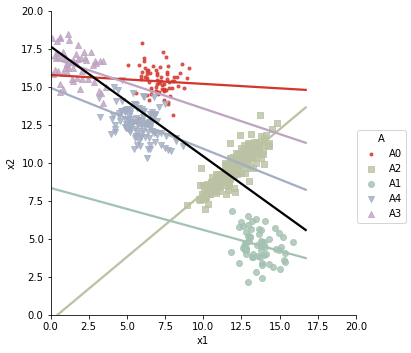

In [30]:
dist_only = [d for d in dist_det if not(d in bin_det)]
print(len(dist_only))
cursel = 0
view_to_plot = labeled_df_dist.result_df.loc[dist_only[cursel],['feat1','feat2','group_feat']]
bold_level = labeled_df_dist.result_df.loc[dist_only[cursel],'subgroup']

labeled_df_dist.sp_plot(*view_to_plot,bold_color_val=bold_level)
labeled_df_dist.result_df.loc[dist_only[cursel]]

In [31]:
[labeled_df_dist.df[c].value_counts().min() for c in labeled_df_dist.get_vars_per_role('groupby')]

[63, 135, 38, 90, 41, 54, 62, 32]

48

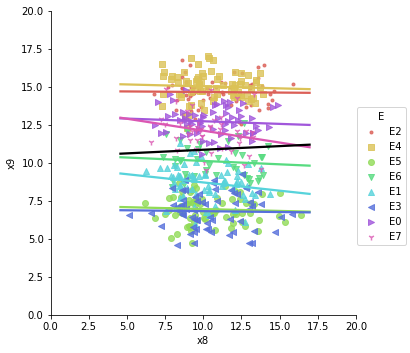

In [16]:
labeled_df_dist.sp_plot('x8','x9','E')
np.sum(labeled_df_dist.df['E']=='E7')

In [17]:
labeled_df_dist.result_df[labeled_df_dist.result_df['distance']>30][:10]

,feat1,feat2,group_feat,subgroup,subgroup_trend,subgroup_trend_quality,trend_type,agg_trend,agg_trend_quality,distance,SP_thresh_0.2


In [18]:
labeled_df_dist.get_trend_rows('x5','x6','C')

,feat1,feat2,group_feat,subgroup,subgroup_trend,subgroup_trend_quality,trend_type,agg_trend,agg_trend_quality,distance,SP_thresh_0.2
2114,x5,x6,C,C0,-0.415853,0.409304,lin_reg,0.0248,0.032153,0.133338,False
2115,x5,x6,C,C1,0.740325,0.765229,lin_reg,0.0248,0.032153,0.194960,False
2116,x5,x6,C,C2,-0.468525,0.435692,lin_reg,0.0248,0.032153,0.147361,False
2117,x5,x6,C,C3,0.939386,0.792726,lin_reg,0.0248,0.032153,0.232162,True
2118,x5,x6,C,C4,-0.493516,0.500939,lin_reg,0.0248,0.032153,0.153821,False
2119,x5,x6,C,C5,-0.214867,0.243972,lin_reg,0.0248,0.032153,0.075262,False


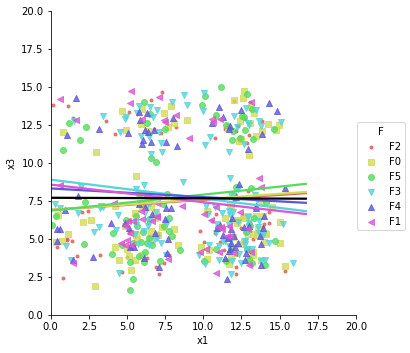

In [19]:
view_to_plot = labeled_df_dist.result_df.loc[70,['feat1','feat2','group_feat']]

labeled_df_dist.sp_plot(*view_to_plot)

/home/smb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  


feat1                           x1
feat2                           x2
group_feat                       A
subgroup                        A2
subgroup_trend            0.839476
subgroup_trend_quality    0.852948
trend_type                 lin_reg
agg_trend                -0.722544
agg_trend_quality         0.809255
distance                  0.421458
SP_thresh_0.2                 True
Name: 2, dtype: object

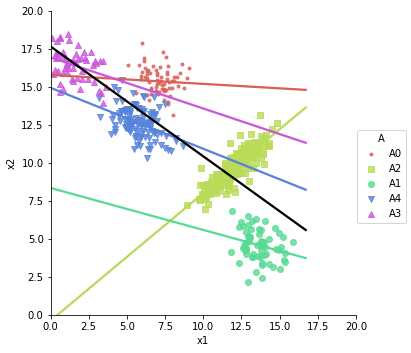

In [20]:
# look at the first of the random selection
row_to_view = labeled_df_dist.result_df['distance'].argmax()
view_to_plot = labeled_df_dist.result_df.loc[row_to_view,['feat1','feat2','group_feat']]

labeled_df_dist.sp_plot(*view_to_plot)
labeled_df_dist.result_df.loc[row_to_view]

For the continuous-valued, we can futher filter 

## Rank SP

# Two types of SP

In [21]:
vals = list(pd.unique(labeled_df_dist.df['A']))

vals.index('A3')

4

In [22]:
import seaborn as sns

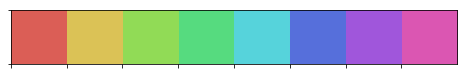

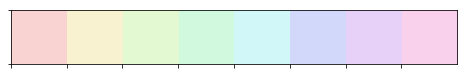

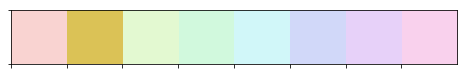

In [23]:
bright_palette = sns.color_palette("hls", 8)
sns.palplot(bright_palette)

dark_pallette = sns.hls_palette(8, l=.9, s=.8)
sns.palplot(dark_pallette)

highlight_pallete = dark_pallette
highlight_pallete[1] = bright_palette[1]
sns.palplot(highlight_pallete)

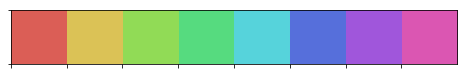

In [24]:
sns.palplot(sns.color_palette("hls", 8))

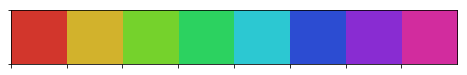

In [25]:
sns.palplot(sns.hls_palette(8, l=.5))

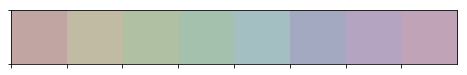

In [26]:
sns.palplot(sns.hls_palette(8, l=.7, s=.2))

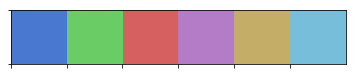

In [27]:
sns.palplot(sns.color_palette("muted"))